In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme(style="darkgrid")

# Algorytm Isodata 

In [2]:
x=np.array([1,1,1,2,3,3,4,5,5,5])
y=np.array([2,3,4,1,1,3,1,2,3,4])

In [3]:
B1=np.array([1,5,9])
B2=np.array([2,4,6,8,10])
B3=np.array([3,7])

In [4]:
B=np.array([[1,0,0,0,1,0,0,0,1,0],
            [0,1,0,1,0,1,0,1,0,1],
            [0,0,1,0,0,0,1,0,0,0]
           ])
B

array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]])

In [5]:
arr = np.zeros([3,10])
for b in B1:
    arr[0,b-1]=1
for b in B2:
    arr[1,b-1]=1
for b in B3:
    arr[2,b-1]=1
arr

array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]])

In [6]:
np.mean(x.take(B2-1))

3.2

In [7]:
y.take(B1-1)

array([2, 1, 3])

In [8]:
m=np.array([[np.mean(x.take(B1-1)), np.mean(x.take(B2-1)), np.mean(x.take(B3-1))],
           [np.mean(y.take(B1-1)),np.mean(y.take(B2-1)), np.mean(y.take(B3-1))]
           ])
m

array([[3. , 3.2, 2.5],
       [2. , 2.6, 2.5]])

In [9]:
def eq_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [10]:
a=np.array([x[0],y[0]])
b=np.array([m[0][0], m[1][0]])
eq_dist(a,b)

2.0

In [11]:
m1 = np.array([m[0][0], m[1][0]])
m2 = np.array([m[0][1], m[1][1]])
m3 = np.array([m[0][2], m[1][2]])
D1=np.array([
            [eq_dist(np.array([xi,yi]),m1) for xi,yi in zip(x,y)], 
            [eq_dist(np.array([xi,yi]),m2) for xi,yi in zip(x,y)],
            [eq_dist(np.array([xi,yi]),m3) for xi,yi in zip(x,y)]
           ])
D1 =np.around(D1,2)
D1

array([[2.  , 2.24, 2.83, 1.41, 1.  , 1.  , 1.41, 2.  , 2.24, 2.83],
       [2.28, 2.24, 2.61, 2.  , 1.61, 0.45, 1.79, 1.9 , 1.84, 2.28],
       [1.58, 1.58, 2.12, 1.58, 1.58, 0.71, 2.12, 2.55, 2.55, 2.92]])

In [14]:
min_arr = [np.min(D1[0]),np.min(D1[1]),np.min(D1[2])]
min_arr

[1.0, 0.45, 0.71]

In [15]:
B2 = np.zeros([3,10])
for i,d_col in enumerate(D1.T):
    min_val = np.min(d_col)
    index_min = np.where(d_col==min_val)
    B2[index_min[0],i]=1
    
B2

array([[0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
G1 = np.where(B2[0]==1)[0]
G2 = np.where(B2[1]==1)[0]
G3 = np.where(B2[2]==1)[0]

In [17]:
G1

array([3, 4, 6])

In [18]:
G2

array([5, 7, 8, 9])

In [26]:
G3

array([0, 1, 2])

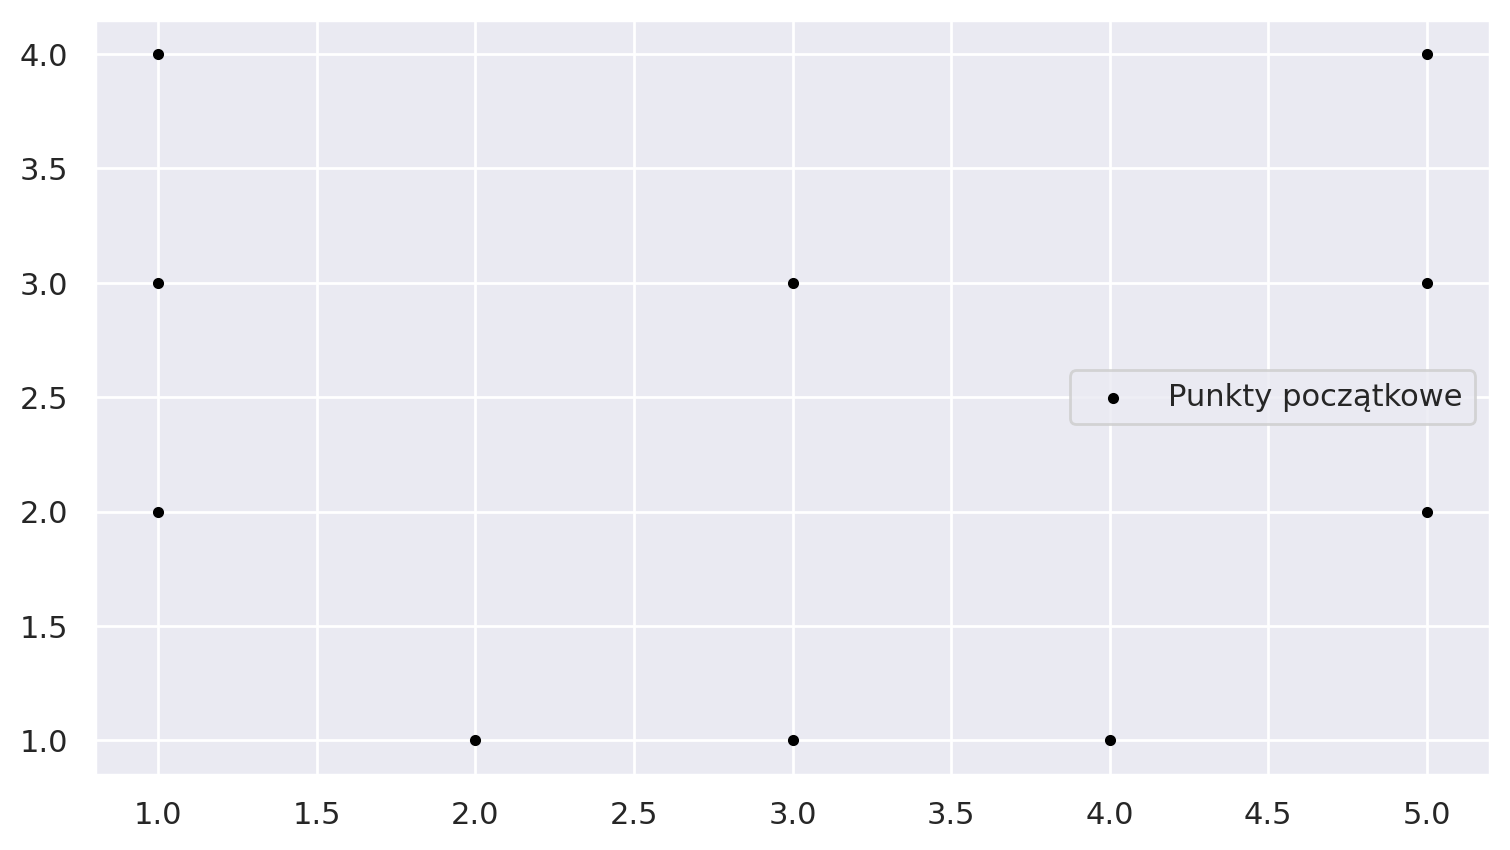

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
fig.set_dpi(200)
ax.scatter(x, y,marker='.', color="black", label="Punkty początkowe")
ax.legend()

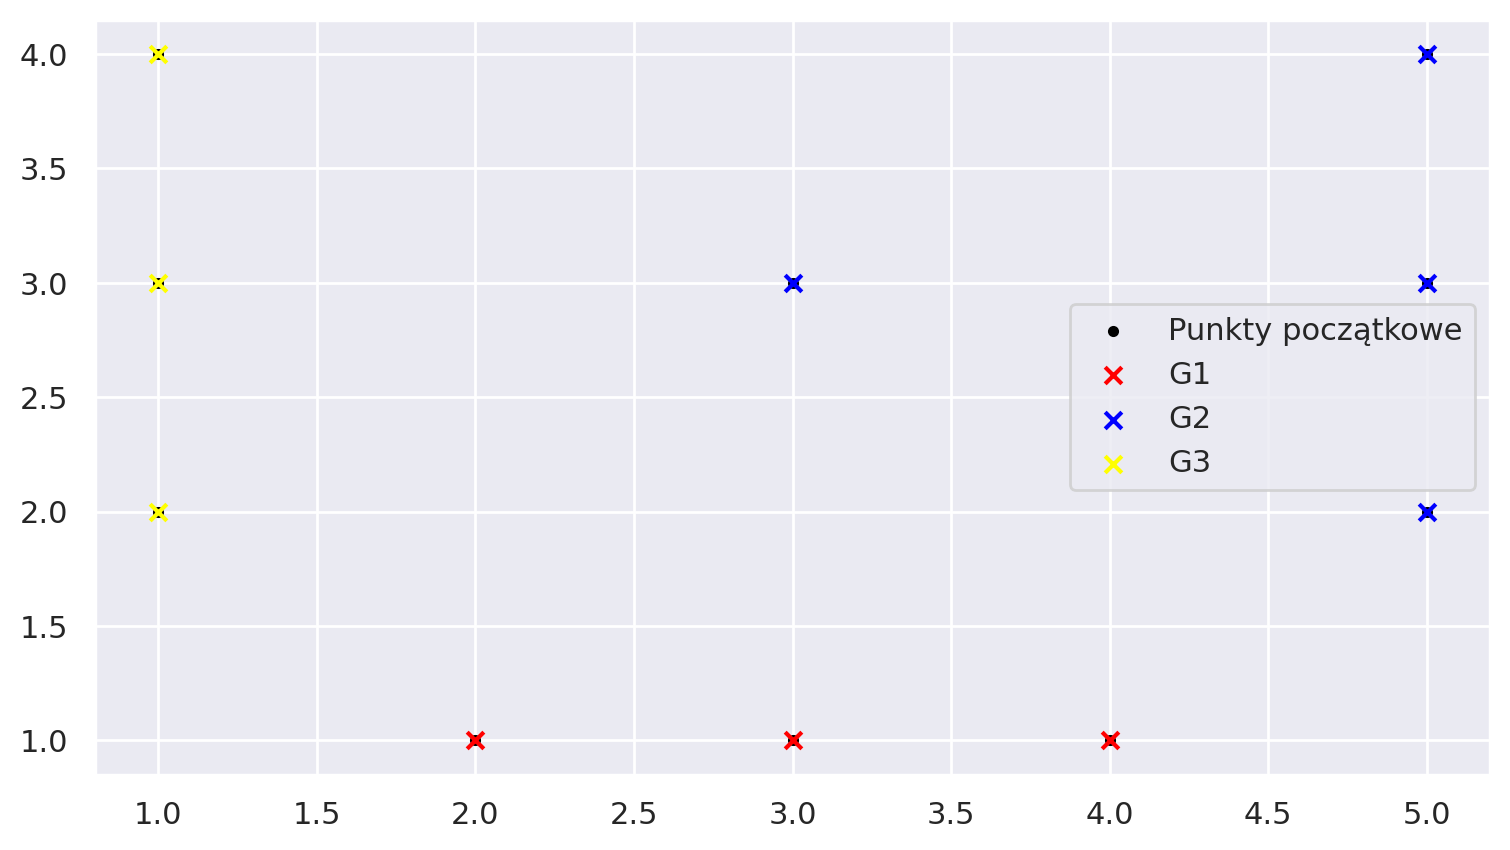

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
fig.set_dpi(200)
ax.scatter(x, y,marker='.', color="black", label="Punkty początkowe")
ax.scatter(x.take(G1), y.take(G1), color="red",marker='x', label="G1")
ax.scatter(x.take(G2), y.take(G2), color="blue",marker='x', label="G2")
ax.scatter(x.take(G3), y.take(G3), color="yellow",marker='x', label="G3")

ax.legend()

In [21]:
D1.T[0]

array([2.  , 2.28, 1.58])